<a href="https://colab.research.google.com/github/nandana1695/irs-lab/blob/main/irs_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
#Importing Required Libraries
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter
import random
import string

# Ensure punkt tokenizer models are downloaded
nltk.download('punkt')

# Sample text for demonstration
sample_text = """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human (natural) languages.
The ultimate objective of NLP is to understand, interpret, and generate human languages in a valuable way."""

# Function to preprocess text: lowercasing & removing punctuation
def preprocess_text(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation))

# Step 1: Tokenizing the sample text into words
text = preprocess_text(sample_text)
tokens = nltk.word_tokenize(text)

# Step 2: N-gram generation class
class NGramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = None
        self.context_counts = None

    def train(self, tokens):
        ngrams_list = list(ngrams(tokens, self.n))
        self.ngram_counts = Counter(ngrams_list)
        self.context_counts = Counter(tuple(ngram[:-1]) for ngram in ngrams_list)

    def calculate_probability(self, sequence):
        context = tuple(sequence[:-1])
        word = sequence[-1]
        ngram_count = self.ngram_counts.get(tuple(sequence), 0)
        context_count = self.context_counts.get(context, 0)

        if context_count > 0:
            return ngram_count / context_count
        return 0.0

    def generate_text(self, seed_words, length):
        current_state = seed_words[-(self.n-1):]
        generated = list(current_state)

        for _ in range(length):
            possible_next_words = []
            for ngram in self.ngram_counts.keys():
                if ngram[:-1] == tuple(current_state):
                    possible_next_words.append(ngram[-1])

            if not possible_next_words:
                break

            next_word = random.choice(possible_next_words)
            generated.append(next_word)
            current_state = generated[-(self.n-1):]

        return ' '.join(generated)

# Initialize and train model
trigram_model = NGramModel(n=3)
trigram_model.train(tokens)

# Example of calculating probability for a given sequence
test_sequence = ['the', 'ultimate', 'objective']
print(f"Probability of {test_sequence}: {trigram_model.calculate_probability(test_sequence)}")

# Generate text
generated_text = trigram_model.generate_text(['the', 'ultimate'], length=20)
print("Generated Text:", generated_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Probability of ['the', 'ultimate', 'objective']: 1.0
Generated Text: the ultimate objective of nlp is to understand interpret and generate human languages in a valuable way


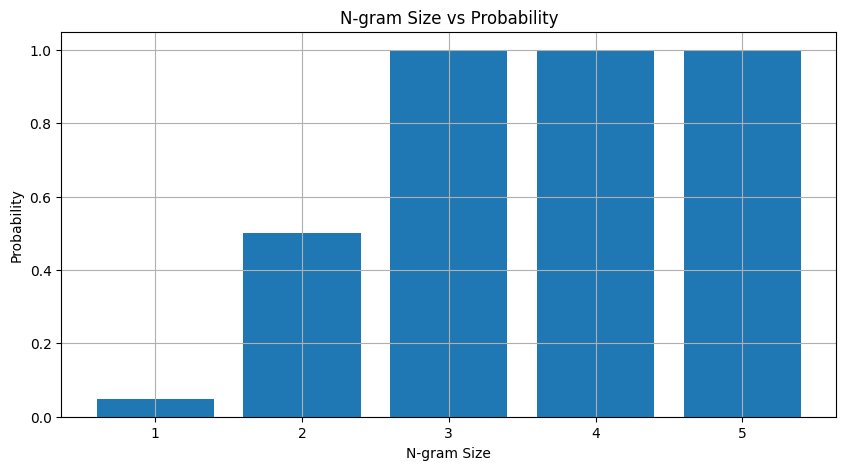

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class VariableNGramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_models = {n: NGramModel(n) for n in range(1, n+1)}

    def train(self, tokens):
        for nmodel in self.ngram_models.values():
            nmodel.train(tokens)

    def calculate_probability(self, sequence):
        n = len(sequence)
        if n < 1 or n > 5:
            raise ValueError("Sequence length must be between 1 and 5.")
        return self.ngram_models[n].calculate_probability(sequence)

    def generate_text(self, seed_words, length):
        n = len(seed_words)
        if n < 1 or n > self.n:
            raise ValueError("Seed words count must be between 1 and n.")
        return self.ngram_models[n].generate_text(seed_words, length)

# Sample text (it can be improved to allow for larger datasets)
tokens = nltk.word_tokenize(preprocess_text(sample_text))

# Train model for N-gram sizes 1-5
ngram_model = VariableNGramModel(n=5)
ngram_model.train(tokens)

# Performance analysis
probabilities = []
for n in range(1, 6):
    seq = tokens[:n]  # Just taking the first n tokens as example
    prob = ngram_model.calculate_probability(seq)
    probabilities.append(prob)

# DataFrame for better visualization
df = pd.DataFrame({'N-gram Size': range(1, 6), 'Probability': probabilities})

# Plotting performance comparison
plt.figure(figsize=(10, 5))
plt.bar(df['N-gram Size'].astype(str), df['Probability'])
plt.title('N-gram Size vs Probability')
plt.xlabel('N-gram Size')
plt.ylabel('Probability')
plt.grid()
plt.show()

In [4]:
import random
import nltk
import string
from nltk.util import ngrams
from collections import Counter, defaultdict

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    return tokens

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def compute_ngram_frequencies(tokens):
    unigram_freq = Counter(generate_ngrams(tokens, 1))
    bigram_freq = Counter(generate_ngrams(tokens, 2))
    trigram_freq = Counter(generate_ngrams(tokens, 3))
    return unigram_freq, bigram_freq, trigram_freq

# Example Usage
if __name__ == "__main__":
    sample_text = "This is a simple example text for N-gram tokenization. This example is simple."
    tokens = preprocess_text(sample_text)
    unigram_freq, bigram_freq, trigram_freq = compute_ngram_frequencies(tokens)

    print("Unigrams:", unigram_freq)
    print("Bigrams:", bigram_freq)
    print("Trigrams:", trigram_freq)


Unigrams: Counter({('this',): 2, ('is',): 2, ('simple',): 2, ('example',): 2, ('a',): 1, ('text',): 1, ('for',): 1, ('ngram',): 1, ('tokenization',): 1})
Bigrams: Counter({('this', 'is'): 1, ('is', 'a'): 1, ('a', 'simple'): 1, ('simple', 'example'): 1, ('example', 'text'): 1, ('text', 'for'): 1, ('for', 'ngram'): 1, ('ngram', 'tokenization'): 1, ('tokenization', 'this'): 1, ('this', 'example'): 1, ('example', 'is'): 1, ('is', 'simple'): 1})
Trigrams: Counter({('this', 'is', 'a'): 1, ('is', 'a', 'simple'): 1, ('a', 'simple', 'example'): 1, ('simple', 'example', 'text'): 1, ('example', 'text', 'for'): 1, ('text', 'for', 'ngram'): 1, ('for', 'ngram', 'tokenization'): 1, ('ngram', 'tokenization', 'this'): 1, ('tokenization', 'this', 'example'): 1, ('this', 'example', 'is'): 1, ('example', 'is', 'simple'): 1})


In [6]:
import random
import nltk
import string
from nltk.util import ngrams
from collections import Counter, defaultdict

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    return tokens

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def compute_ngram_frequencies(tokens):
    unigram_freq = Counter(generate_ngrams(tokens, 1))
    bigram_freq = Counter(generate_ngrams(tokens, 2))
    trigram_freq = Counter(generate_ngrams(tokens, 3))
    return unigram_freq, bigram_freq, trigram_freq

# Example Usage
if __name__ == "__main__":
    sample_text = "This is a simple example text for N-gram tokenization. This example is simple."
    tokens = preprocess_text(sample_text)
    unigram_freq, bigram_freq, trigram_freq = compute_ngram_frequencies(tokens)

    print("Unigrams:", unigram_freq)
    print("Bigrams:", bigram_freq)
    print("Trigrams:", trigram_freq)


Unigrams: Counter({('this',): 2, ('is',): 2, ('simple',): 2, ('example',): 2, ('a',): 1, ('text',): 1, ('for',): 1, ('ngram',): 1, ('tokenization',): 1})
Bigrams: Counter({('this', 'is'): 1, ('is', 'a'): 1, ('a', 'simple'): 1, ('simple', 'example'): 1, ('example', 'text'): 1, ('text', 'for'): 1, ('for', 'ngram'): 1, ('ngram', 'tokenization'): 1, ('tokenization', 'this'): 1, ('this', 'example'): 1, ('example', 'is'): 1, ('is', 'simple'): 1})
Trigrams: Counter({('this', 'is', 'a'): 1, ('is', 'a', 'simple'): 1, ('a', 'simple', 'example'): 1, ('simple', 'example', 'text'): 1, ('example', 'text', 'for'): 1, ('text', 'for', 'ngram'): 1, ('for', 'ngram', 'tokenization'): 1, ('ngram', 'tokenization', 'this'): 1, ('tokenization', 'this', 'example'): 1, ('this', 'example', 'is'): 1, ('example', 'is', 'simple'): 1})
